In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [29]:
X_linear, y_linear = datasets.make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

In [30]:
X_inseparable, y_inseparable = datasets.make_moons(n_samples=100, noise=0.1, random_state=42)

In [31]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.3, random_state=42)
X_train_inseparable, X_test_inseparable, y_train_inseparable, y_test_inseparable = train_test_split(X_inseparable, y_inseparable, test_size=0.3, random_state=42)


In [32]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_linear, y_train_linear)


SVC(kernel='linear')

In [33]:
y_pred_linear = svm_linear.predict(X_test_linear)

In [34]:
svm_inseparable = SVC(kernel='rbf')  # Using RBF kernel for non-linear classification
svm_inseparable.fit(X_train_inseparable, y_train_inseparable)


SVC()

In [35]:
y_pred_inseparable = svm_inseparable.predict(X_test_inseparable)

In [36]:
def evaluate_model(y_test, y_pred):
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))



In [37]:
print("Linearly Separable Dataset Performance:")
evaluate_model(y_test_linear, y_pred_linear)


Linearly Separable Dataset Performance:
Confusion Matrix:
 [[14  0]
 [ 0 16]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


In [38]:
print("\nInseparable Dataset Performance:")
evaluate_model(y_test_inseparable, y_pred_inseparable)



Inseparable Dataset Performance:
Confusion Matrix:
 [[19  1]
 [ 0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


In [42]:
def plot_decision_boundary(svm, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Decision Boundary (Linearly Separable)')
    plt.show()



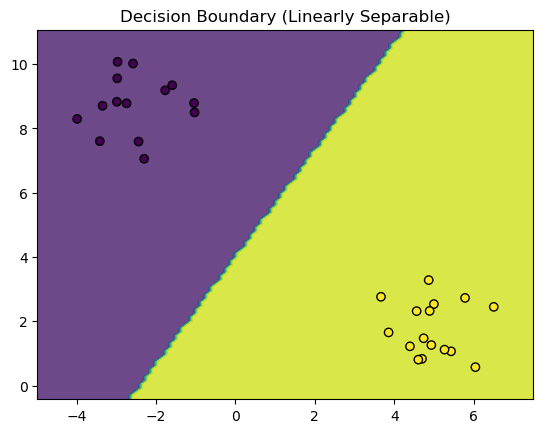

In [43]:

plot_decision_boundary(svm_linear, X_test_linear, y_test_linear)    # separable

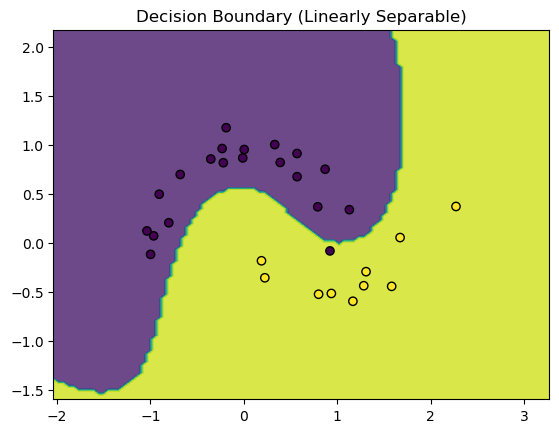

In [47]:
plot_decision_boundary(svm_inseparable, X_test_inseparable, y_test_inseparable)      # inseparable 